<a href="https://colab.research.google.com/github/Rutvik17-tech/Sign_language_Recoginition/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00


In [6]:
import numpy as np 
import random as rd

import plotly.express as px

from PIL import Image
import pandas as pn

import seaborn as sns
import matplotlib.pyplot as pic
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(10)
tf.random.set_seed(20)


In [7]:
tn = pn.read_csv("../content/Input/sign_mnist_train.csv")
tn.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
tt = pn.read_csv("../content/Input/sign_mnist_test.csv")
tt.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [9]:

print(sum(tn.isna().sum()))


print(sum(tt.isna().sum()))

0
0


In [10]:

print(sum(tn.isnull().sum()))

print(sum(tt.isnull().sum()))

0
0


In [11]:

b_1 = tn["label"]


a_1 = tn.drop(labels = ["label"],axis = 1) 

In [12]:

b_2 = tt["label"]


a_2 = tt.drop(labels = ["label"],axis = 1) 

In [13]:

a_1 = a_1 / 250.0

a_2 = a_2 / 250.0

In [14]:
a_1 = a_1.values.reshape(-1,28,28,1)
a_2 = a_2.values.reshape(-1,28,28,1)
print(a_1.shape)
print(a_2.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


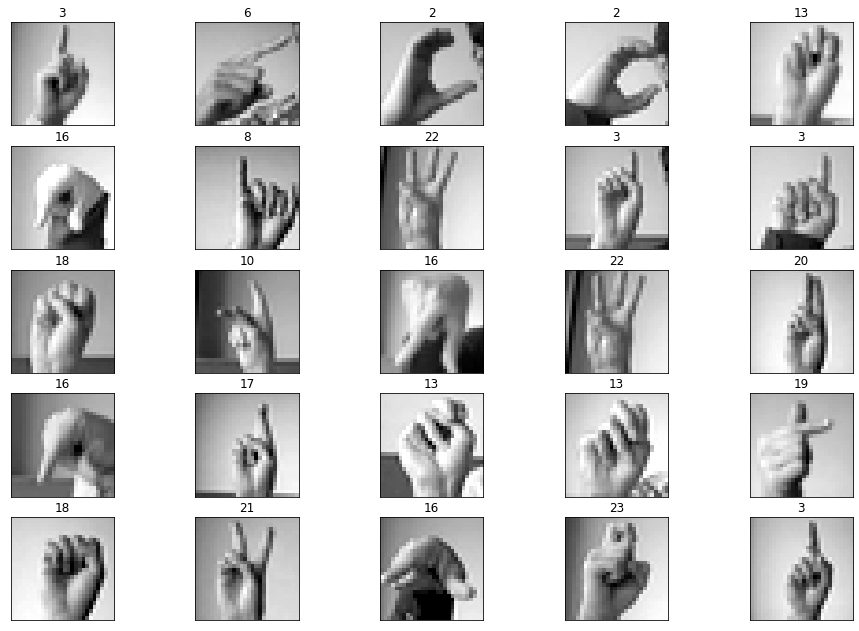

In [15]:

fig, ax = pic.subplots(nrows=5, ncols=5, figsize=(16, 11),
                        subplot_kw={'xticks': [], 'yticks': []})

for n in range(25):
    pic.subplot(5,5,n+1)
    pic.imshow(a_1[n], cmap='gray')
    pic.title(b_1[n])
pic.show()

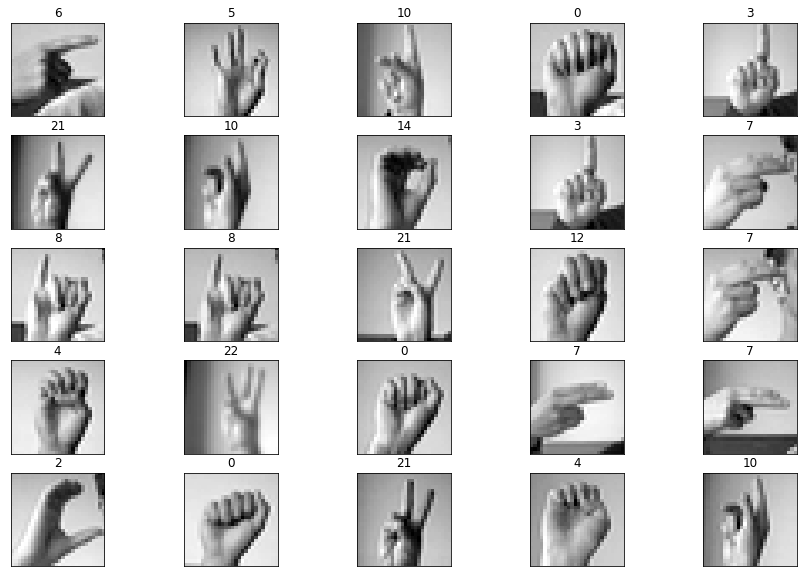

In [16]:

fig, ax = pic.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for n in range(25):
    pic.subplot(5,5,n+1)
    pic.imshow(a_2[n], cmap='gray')
    pic.title(b_2[n])
pic.show()

In [17]:

a_1, X_val, b_1, Y_val = train_test_split(a_1, b_1, test_size = 0.3, random_state=7)

In [18]:

print(a_1.shape)
print(b_1.shape)
print(X_val.shape)
print(Y_val.shape)
print(a_2.shape)
print(b_2.shape)

(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


In [19]:
main = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [20]:
main.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:

history = main.fit(
    x = a_1,
    y = b_1,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=50,
    verbose=2,
)


Epoch 1/50
151/151 - 38s - loss: 3.2188 - accuracy: 0.0872 - val_loss: 3.3028 - val_accuracy: 0.0459 - 38s/epoch - 251ms/step
Epoch 2/50
151/151 - 33s - loss: 2.3941 - accuracy: 0.2602 - val_loss: 2.7490 - val_accuracy: 0.1565 - 33s/epoch - 216ms/step
Epoch 3/50
151/151 - 36s - loss: 1.5006 - accuracy: 0.4881 - val_loss: 1.1109 - val_accuracy: 0.6814 - 36s/epoch - 240ms/step
Epoch 4/50
151/151 - 34s - loss: 1.0196 - accuracy: 0.6423 - val_loss: 0.5698 - val_accuracy: 0.8513 - 34s/epoch - 222ms/step
Epoch 5/50
151/151 - 35s - loss: 0.7496 - accuracy: 0.7324 - val_loss: 0.3319 - val_accuracy: 0.9136 - 35s/epoch - 232ms/step
Epoch 6/50
151/151 - 33s - loss: 0.5677 - accuracy: 0.8000 - val_loss: 0.2628 - val_accuracy: 0.9285 - 33s/epoch - 220ms/step
Epoch 7/50
151/151 - 33s - loss: 0.4467 - accuracy: 0.8445 - val_loss: 0.1574 - val_accuracy: 0.9631 - 33s/epoch - 220ms/step
Epoch 8/50
151/151 - 32s - loss: 0.3573 - accuracy: 0.8775 - val_loss: 0.1083 - val_accuracy: 0.9764 - 32s/epoch - 213

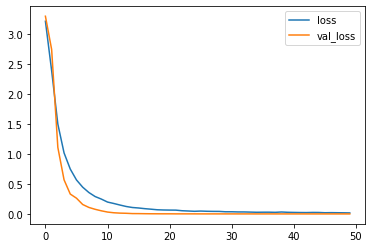

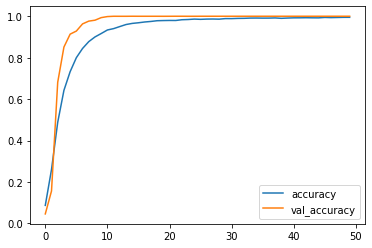

In [22]:
history_frame = pn.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [23]:
predictions = main.predict(a_2)
predictions = np.argmax(predictions,axis = 1)

print(classification_report(b_2, predictions))

225/225 [==============================] - 4s 16ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      0.98      0.99       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       0.99      1.00      1.00       394
          13       1.00      0.99      0.99       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       0.95      1.00      0.98       164
          17       0.99  